<a href="https://colab.research.google.com/github/Zelofane22/IA-aprentissage/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Code utilisé pour supprimer les fichiers corrompus du dataset
"""
from PIL import Image
import os


def clean_image_folders(root_folder):

    # Parcourt récursivement le dossier principal
    for root, _, files in os.walk(root_folder):
        for filename in files:
            file_path = os.path.join(root, filename)

            # Vérifie si le fichier est une image valide
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Vérifie l'intégrité du fichier image
            except Exception as e:
                # Supprime le fichier s'il génère une erreur
                os.remove(file_path)
                print(f"[SUPPRIMÉ] {file_path} : Erreur lors de l'identification ({e}).")

root_folder = "pistolet_images"  # Chemin vers le dossier principal
clean_image_folders(root_folder)
"""

In [ ]:
# @title Code utilisé pour supprimer les images de mauvais format du dataset
"""import tensorflow as tf
import os
from tqdm import tqdm


for subdir, _, files in os.walk("/content/ggDrive/MyDrive/AI & Jeu/pistolet_images"):
    i = 0
    for file in tqdm(files, desc=subdir):
        file_path = os.path.join(subdir, file)
        # Filtrer les fichiers invalides
        try:
            tf.io.decode_image(tf.io.read_file(file_path))
        except:
            os.remove(file_path)
            i += 1
    print(f">>> {i} images non valides dans {subdir}")"""

/content/ggDrive/MyDrive/AI & Jeu/pistolet_images: 0it [00:00, ?it/s]


>>> 0 images non valides dans /content/ggDrive/MyDrive/AI & Jeu/pistolet_images


/content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Colt M1911: 100%|██████████| 1048/1048 [00:40<00:00, 25.78it/s]


>>> 11 images non valides dans /content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Colt M1911


/content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Walther P22: 100%|██████████| 887/887 [00:30<00:00, 29.53it/s]


>>> 8 images non valides dans /content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Walther P22


/content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Derringer: 100%|██████████| 1092/1092 [00:24<00:00, 43.76it/s] 


>>> 12 images non valides dans /content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Derringer


/content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Sig Sauer P365: 100%|██████████| 936/936 [00:40<00:00, 23.38it/s] 


>>> 16 images non valides dans /content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Sig Sauer P365


/content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Glock 17: 100%|██████████| 1108/1108 [00:31<00:00, 35.09it/s] 


>>> 13 images non valides dans /content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Glock 17


/content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Smith & Wesson 686: 100%|██████████| 1151/1151 [00:45<00:00, 25.14it/s] 


>>> 7 images non valides dans /content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Smith & Wesson 686


/content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Beretta 92: 100%|██████████| 1333/1333 [00:51<00:00, 25.95it/s]


>>> 27 images non valides dans /content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Beretta 92


/content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Ruger LCP: 100%|██████████| 931/931 [00:28<00:00, 32.14it/s] 

>>> 14 images non valides dans /content/ggDrive/MyDrive/AI & Jeu/pistolet_images/Ruger LCP


In [ ]:
from google.colab import drive
drive.mount('/content/ggDrive', force_remount=True)

Mounted at /content/ggDrive


In [ ]:
# @title Data Loader
import keras
train, valid = keras.utils.image_dataset_from_directory(
                                                directory = '/content/ggDrive/MyDrive/AI & Jeu/pistolet_images',
                                                batch_size=64,
                                                image_size=(64, 64),
                                                validation_split=0.2,
                                                subset='both',
                                                seed = 14)

Found 8368 files belonging to 8 classes.
Using 6695 files for training.
Using 1673 files for validation.


In [ ]:
print(train.class_names)

['Beretta 92', 'Colt M1911', 'Derringer', 'Glock 17', 'Ruger LCP', 'Sig Sauer P365', 'Smith & Wesson 686', 'Walther P22']


In [ ]:
# @title Fonction pour afficher le contenu d'un batch
import matplotlib.pyplot as plt
import numpy as np
def ShowSamples(T):
  plt.figure(figsize=(10, 10))
  plt.subplots_adjust(top=1)
  for images, labels in T.take(1):
          for i in range(10):
                  ax = plt.subplot(7, 7, i + 1)
                  plt.imshow(np.array(images[i]).astype("uint8"))
                  plt.title(train.class_names[labels[i]])
                  plt.axis("off")


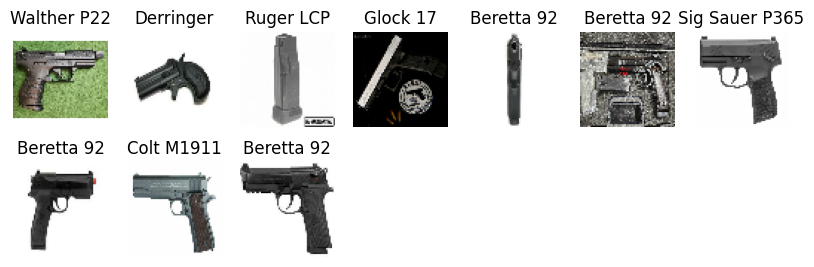

In [ ]:
# @title contenu du batch 1
ShowSamples(train)

In [ ]:
# @title Normalisation
# normalization_layer = keras.layers.Rescaling(1./255)

# normalized_train = train.map(lambda x, y: (normalization_layer(x), y))
# normalized_valid = valid.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
# @title Data Augmentation
data_augmentation_layers = [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
]

def data_augmentation(images):
        for layer in data_augmentation_layers:
                images = layer(images)
        return images

augmented_train = train.map( lambda x, y: (data_augmentation(x), y))

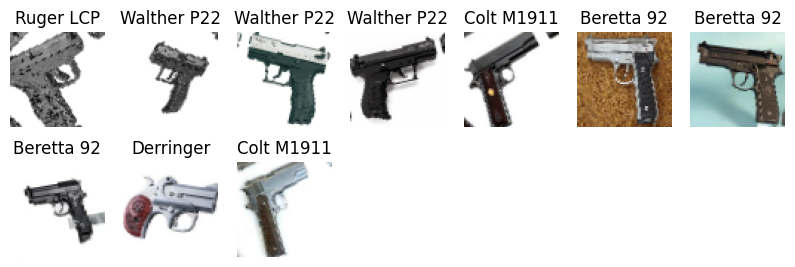

In [ ]:
# @title Affichage
ShowSamples(augmented_train)

In [ ]:
# @title réseau FC
model = keras.Sequential()
model.add(keras.Input(shape=(64,64,3)))
model.add(keras.layers.Rescaling(1.0 / 255))     ## couche supplémentaire pour l'étalonnage
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))

model.summary()

model.compile(optimizer='adam',
      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,574,282 (6.01 MB)

 Trainable params: 1,574,282 (6.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# @title Apprentissage
folder = '/content/ggDrive/MyDrive/AI & Jeu/'
callbacks = [ keras.callbacks.ModelCheckpoint(folder+'network.keras', verbose = True), # sauvegarde des resultats de l'apprentissage
              keras.callbacks.CSVLogger(folder+'model_history_log.csv', append=True) ]

model.fit(x=augmented_train, epochs=3,callbacks=callbacks)

Epoch 1/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.1414 - loss: 2.6771
Epoch 1: saving model to /content/ggDrive/MyDrive/AI & Jeu/network.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 92s 871ms/step - accuracy: 0.1415 - loss: 2.6745
Epoch 2/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 853ms/step - accuracy: 0.1586 - loss: 2.3026
Epoch 2: saving model to /content/ggDrive/MyDrive/AI & Jeu/network.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 90s 854ms/step - accuracy: 0.1586 - loss: 2.3026
Epoch 3/3
104/105 ━━━━━━━━━━━━━━━━━━━━ 0s 928ms/step - accuracy: 0.1607 - loss: 2.3026
Epoch 3: saving model to /content/ggDrive/MyDrive/AI & Jeu/network.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 149s 921ms/step - accuracy: 0.1606 - loss: 2.3026
